In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
!pip install seaborn

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

2024-03-15 12:16:22.202097: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 12:16:22.202193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 12:16:22.331985: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_train=train_df.drop('label',axis=1)
y_train=train_df.label

In [6]:
y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [7]:
x_train=x_train.values.reshape(-1,28,28,1)

In [8]:
x_train[0].shape

(28, 28, 1)

In [9]:
y_train[0]

1

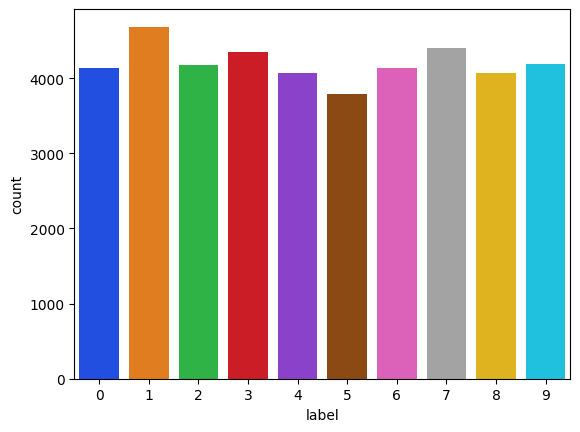

In [10]:
sns.countplot(x='label',data=train_df,palette='bright')
plt.show()

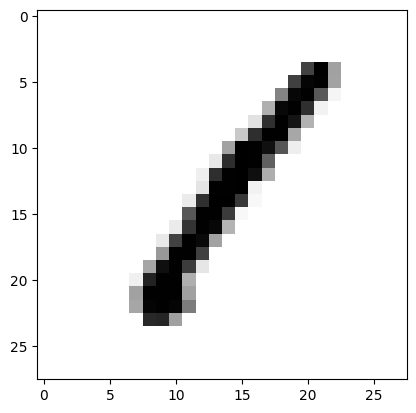

In [11]:
plt.imshow(x_train[0],cmap='binary')

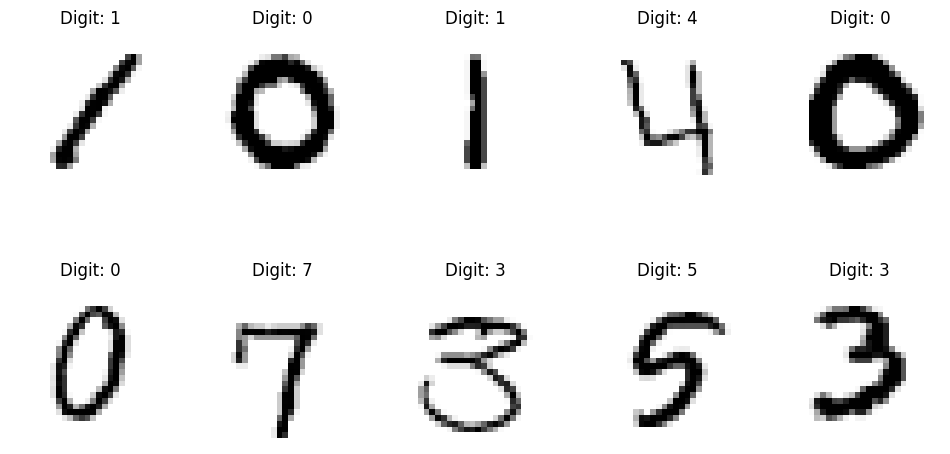

In [12]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="binary") 
    plt.title(f"Digit: {y_train[i]}")  
    plt.axis('off')
plt.show()

In [13]:
x_train=np.array(x_train)/255

In [14]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)

In [15]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
x_tr,x_val,y_tr,y_val=train_test_split(x_train,y_train,test_size=0.1,stratify=y_train,random_state=42)

Text(0.5, 1.0, '9')

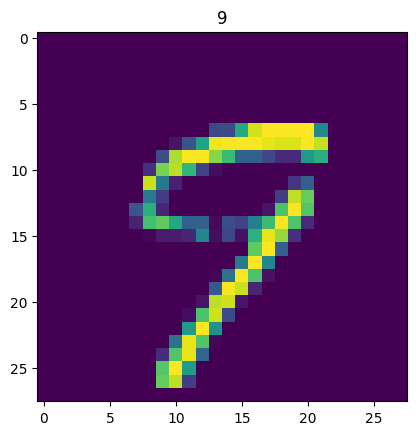

In [17]:
plt.imshow(x_tr[0])
plt.title(np.argmax(y_tr[0]))

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999 ),metrics = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564,138 (2.15 MB)

 Trainable params: 564,138 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,          
    width_shift_range=0.1,      
    height_shift_range=0.1,     
    zoom_range=0.1,             
    horizontal_flip=False,      
    vertical_flip=False,        
)

datagen.fit(x_train)

In [22]:
hist=model.fit(datagen.flow(x_train, y_train, batch_size=256), 
                epochs=50)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  3/165 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.1335 - loss: 2.2999  

I0000 00:00:1710505013.409245      77 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


165/165 ━━━━━━━━━━━━━━━━━━━━ 33s 124ms/step - accuracy: 0.5802 - loss: 1.1995
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 24s 83ms/step - accuracy: 0.9506 - loss: 0.1667
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9603 - loss: 0.1310
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9737 - loss: 0.0862
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9783 - loss: 0.0716
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 84ms/step - accuracy: 0.9793 - loss: 0.0703
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.9811 - loss: 0.0647
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.9826 - loss: 0.0590
Epoch 9/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9839 - loss: 0.0551
Epoch 10/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9850 - loss: 0.0470
Epoch 11/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.9853 - loss: 0.0475
Epoch 12/50
165/165 ━━━━━━━━━━━━━━━━━━━━

In [23]:
test_df=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
test_df.shape

(28000, 784)

In [25]:
test=test_df.values.reshape(-1,28,28,1)
#x_train=x_train.values.reshape(-1,28,28,1)

In [26]:
test=np.array(test)/255

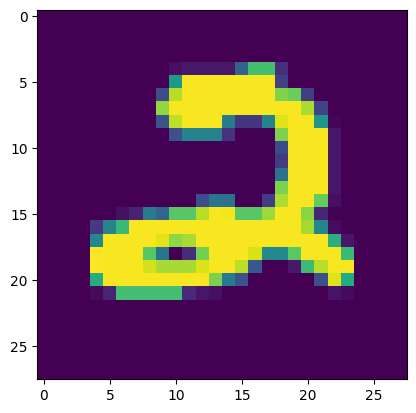

In [27]:
plt.imshow(test[0])

In [28]:
pred=model.predict(test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [29]:
len(pred)

28000

In [30]:
pred_val=[]
for i in pred:
    pred_val.append(np.argmax(i))

In [31]:
pred_val[:5]

[2, 0, 9, 0, 3]

In [32]:
results = np.argmax(pred,axis=1) 
results = pd.Series(results,name="Label")
submission =pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)

In [33]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [34]:
submission.to_csv("submission.csv",index=False)

In [35]:
sub=pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [36]:
sub.Label=pred_val

In [37]:
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [38]:
sub.to_csv('submission.csv',index=False)